<a href="https://colab.research.google.com/github/Andres-Gress/Simulacion-I/blob/main/PruebaDeFrecuencias_Simu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="red">PRUEBA DE FRECUENCIAS</font>

Prueba de hipótesis mediante la prueba de frecuenicas para saber si un conjunto de datos aleatorios son provenientes de una distribución uniforme $U(0,1)$


Se define la prueba de hipótesis de la siguiente manera:

$$H_0 : \text{La muestra proviene de } U(0,1)$$

$$H_a: \text{La muestra NO proviene de } U(0,1)$$


Se procederá mediante una distribución $\chi^2_{n-1}$ con un total de 100 datos ya dados

In [1]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import pandas as pd
import tabulate

Librerias necesarias para llevar acabo los cálculos, cabe destacar que scipy.stats es para calular el punto crítico de una distribución $\chi^2_{n-1}$
Y tabulate para hacer tablas


In [42]:
url = 'https://raw.githubusercontent.com/Andres-Gress/Simulacion-I/refs/heads/main/datos.txt' #Url de github en raw para llamarlo posteriormente

data = pd.read_csv(url, header=None) #Obtiene los archivos del URL y se indica que no hay encabezados
data = data.dropna(axis=1, how='all')  #Elimina columnas de NaN que se generan por default
datos=data.iloc[0] #Lo hace un vector columna para poder trabajar
datos

,0
0,0.78961
1,0.05230
2,0.10639
3,0.55877
4,0.14151
...,...
95,0.22287
96,0.07281
97,0.64183
98,0.44267


100 datos obtenidos de un archivo de github y convertido a un vector columna para poder operar con el.

In [43]:
def frecuencias(datos,fe,a):
  bins = [0,0.2,0.4,0.6,0.8,1.0]
  indices = np.digitize(datos, bins, right=False)
  conteos = [(indices == i).sum() for i in range(1, len(bins))] #Cuenta cuantos datos hay en cada intervalo

  n=len(conteos)
  chi=0
  muestra=[]
  for i in range(n):
    interv = [bins[i],bins[i+1]]
    frecuencia = conteos[i]
    dif = (frecuencia - fe)**2/fe #fe es la frecuencia esperada
    muestra.append([interv,frecuencia,fe,dif])
    chi += dif #Estadistico de prueba

  encabezados = ["Intervalo", "Frec. Observada", "Frec. Esperada", "(f0-fe)^2/fe"]
  print(tabulate.tabulate(muestra,headers=encabezados,tablefmt="psql",numalign="center"))

  k=len(bins)-1 #Cuenta los datos que hay en los intervalos pero da un extra porque cuenta los extremos, no intervalos
  gl = k-1 #Grados de libertad
  critico = chi2.ppf(1 - a, gl) #Obtiene el punto crítico
  if critico < chi:
    print("Se rechaza H0: La muestra proviene de U(0,1)")
  else:
    print("No se rechaza H0: La muestra proviene de U(0,1)")

Se crea la función que a través de un intervalo proporcionado realiza los conteos para obtener las frecuencias observadas.

Posteriormente se calculan los datos necesarios para obtener el estadistico de prueba $\chi^2$. estos se obtienen de la forma:

$\sum \frac{(f_0 - f_e)^2}{fe}=\chi^2 $

Donde $f_e$ es la frecuencia esperada (proporcional o equivalente, todas son iguales)

A partir de ahí comienza el uso de la libreria que calcula el punto crítico y lo compara con el estadístico de prueba para así determinar si se rechaza o no la hipótesis nula.

Sólo requiere un nivel de confianza $1-\alpha$ con $n-1$ grados de libertad

De igual manera se da la instrucción de imprimir una tabla con los valores de interés, esto con la libreria tabulate

In [48]:
fe=20
a=0.05
frecuencias(datos,fe,a)

+-------------+-------------------+------------------+----------------+
| Intervalo   |  Frec. Observada  |  Frec. Esperada  |  (f0-fe)^2/fe  |
|-------------+-------------------+------------------+----------------|
| [0, 0.2]    |        21         |        20        |      0.05      |
| [0.2, 0.4]  |        22         |        20        |      0.2       |
| [0.4, 0.6]  |        19         |        20        |      0.05      |
| [0.6, 0.8]  |        23         |        20        |      0.45      |
| [0.8, 1.0]  |        15         |        20        |      1.25      |
+-------------+-------------------+------------------+----------------+
No se rechaza H0: La muestra proviene de U(0,1)


Se manda a llamar la función creada anteriormente, de modo que se aprecia la tabla y se da la conclusión acerca de la prueba de hipótesis, por lo que se concluye que la muestra de los 100 datos proviene de una distribución $U(0,1)$

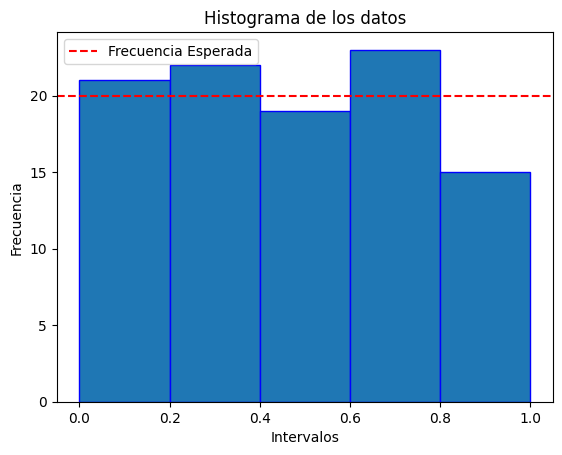

In [47]:
intervalos = [0,0.2,0.4,0.6,0.8,1.0]
plt.hist(datos,bins=intervalos, edgecolor="blue")
plt.title("Histograma de los datos")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.axhline(fe,color="red", linestyle="--", label="Frecuencia Esperada")
plt.legend()
plt.show()

Al gráficar el histograma de los datos se aprecian los intervalos con sus respectivos números de elementos y se marca una línea punteada que es la frecuencia esperada, es decir, que los 5 intervalos sean equiprobables que es ell equivalente a $p=\frac{1}{5}$ y es notorio que no se encuentran muy dispersos los datos de la media, por lo que se puede corroborar que efectivamente la muestra proviene de una distribución $U(0,1)$